In [1]:
import cv2
import matplotlib.pyplot as plt
import os
img =cv2.imread('images/angrybard/Cax_train1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

<Figure size 640x480 with 1 Axes>

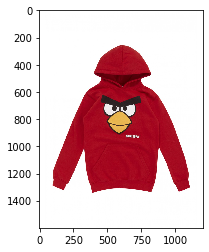

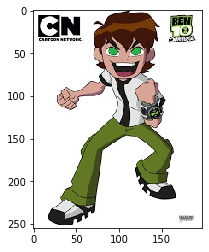

In [2]:
data_dir='images'
folder_list=os.listdir(data_dir)
for folder in folder_list:
    path_dir=os.path.join(data_dir,folder)
    for img in os.listdir(path_dir):
        img_array=cv2.imread(os.path.join(path_dir,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break

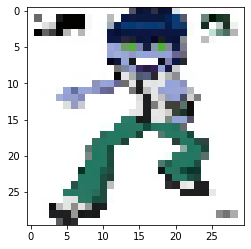

In [3]:
img_size=30
img_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(img_array)
plt.show()

In [4]:
training_data= []
def create_training_data():
    for folder in folder_list:
        path_dir=os.path.join(data_dir,folder)
        class_name=folder
        for img in os.listdir(path_dir):
            img_array=cv2.imread(os.path.join(path_dir,img))
            img_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([img_array,class_name])

In [5]:
create_training_data()

In [6]:
training_data[0]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [9]:
x = []
y = []
for feature,label in training_data:
    x.append(feature)
    y.append(label)

In [11]:
y[0]

'angrybard'

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
from sklearn.model_selection import train_test_split

xtr, xv, ytr, yv = train_test_split(x, encoded_y, test_size=0.1, random_state=0)


In [18]:
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

img_size = 30
data_dir = 'images'
folder_list = os.listdir(data_dir)
training_data = []

def create_training_data():
    for folder in folder_list:
        path_dir = os.path.join(data_dir, folder)
        class_name = folder
        for img in os.listdir(path_dir):
            img_array = cv2.imread(os.path.join(path_dir, img))
            img_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([img_array, class_name])

create_training_data()

x = []
y = []
for feature, label in training_data:
    x.append(feature)
    y.append(label)

encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)

x_train, x_val, y_train, y_val = train_test_split(x, encoded_y, test_size=0.1, random_state=0)

# Flatten the image arrays
x_train_flat = [image.flatten() for image in x_train]
x_val_flat = [image.flatten() for image in x_val]

# Train a Support Vector Classifier (SVC) model
model = SVC()
model.fit(x_train_flat, y_train)

# Make predictions on the validation set
y_pred = model.predict(x_val_flat)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.8333333333333334


In [19]:
x

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  